# Business Problem: Customer Conversion Prediction
## Developing a Predictive Model for Customer Conversion

### Understanding the Problem
The goal is to create a model that can accurately predict which customers are most likely to convert after engaging with digital marketing campaigns. This model can help businesses optimize their marketing efforts by:

* **Targeted Advertising:** Identifying customers with a high probability of conversion allows for more efficient allocation of advertising budgets.
* **Personalized Campaigns:** Tailoring marketing messages to the specific needs and preferences of potential customers can improve conversion rates.
* **Customer Segmentation:** Grouping customers based on their likelihood of conversion can inform more effective marketing strategies.
* **Campaign Evaluation:** Assessing the performance of different marketing campaigns can help businesses identify what works and what doesn't.

# Setting up the environment 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, SVR
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest, chi2, f_regression
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import warnings
# Ignore all warnings
warnings.filterwarnings('ignore')
sns.set_style("darkgrid")
#  Preset options: "white", "dark", "whitegrid", "darkgrid", "ticks"

**Here's a breakdown of each library's primary function:**

* **pandas (pd):** Provides tools for data manipulation and analysis, including dataframes and series.
* **numpy (np):** Offers efficient numerical operations and arrays.
* **matplotlib.pyplot (plt):** Creates static, animated, and interactive visualizations.
* **seaborn (sns):** Provides a high-level interface for drawing attractive statistical graphics.
* **scikit-learn (sklearn):** Contains tools for machine learning tasks, including classification, regression, clustering, and more.
* **warnings:** Handles warnings and exceptions in Python programs.
* **sns.set_style:** Sets the overall aesthetic style for plots created with Seaborn.


### Reading the data

In [2]:
df = pd.read_csv("E:\\projects\\Notebooks\\Predict Conversion in Digital Marketing\\archive\\digital_marketing_campaign_dataset.csv")

**Overview**

This dataset provides a comprehensive view of customer interactions with digital marketing campaigns. It includes demographic data, marketing-specific metrics, customer engagement indicators, and historical purchase data, making it suitable for predictive modeling and analytics in the digital marketing domain.

**Features**

| Feature Name | Description |
|---|---|
| **Demographic Information** | |
| CustomerID | Unique identifier for each customer |
| Age | Age of the customer |
| Gender | Gender of the customer (Male/Female) |
| Income | Annual income of the customer in USD |
| **Marketing-specific Variables** | |
| CampaignChannel | The channel through which the marketing campaign is delivered (Email, Social Media, SEO, PPC, Referral) |
| CampaignType | Type of the marketing campaign (Awareness, Consideration, Conversion, Retention) |
| AdSpend | Amount spent on the marketing campaign in USD |
| ClickThroughRate | Rate at which customers click on the marketing content |
| ConversionRate | Rate at which clicks convert to desired actions (e.g., purchases) |
| AdvertisingPlatform | Confidential |
| AdvertisingTool | Confidential |
| **Customer Engagement Variables** | |
| WebsiteVisits | Number of visits to the website |
| PagesPerVisit | Average number of pages visited per session |
| TimeOnSite | Average time spent on the website per visit (in minutes) |
| SocialShares | Number of times the marketing content was shared on social media |
| EmailOpens | Number of times marketing emails were opened |
| EmailClicks | Number of times links in marketing emails were clicked |
| **Historical Data** | |
| PreviousPurchases | Number of previous purchases made by the customer |
| LoyaltyPoints | Number of loyalty points accumulated by the customer |
| **Target Variable** | |
| Conversion | Binary variable indicating whether the customer converted (1) or not (0) |

**Potential Applications**

* Predictive modeling of customer conversion rates
* Analyzing the effectiveness of different marketing channels and campaign types
* Identifying key factors driving customer engagement and conversion
* Optimizing ad spend and campaign strategies to improve ROI

**Dataset Usage and Attribution Notice**

This dataset, shared by Rabie El Kharoua, is original and has never been shared before. It is made available under the CC BY 4.0 license, allowing anyone to use the dataset in any form as long as proper citation is given to the author. A DOI is provided for proper referencing. Please note that duplication of this work within Kaggle is not permitted.

## Exploratory Data Analysis (EDA):

In [3]:
df.head()

,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,AdvertisingPlatform,AdvertisingTool,Conversion
0,8000,56,Female,136912,Social Media,Awareness,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,6,9,4,688,IsConfid,ToolConfid,1
1,8001,69,Male,41760,Email,Retention,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,2,7,2,3459,IsConfid,ToolConfid,1
2,8002,46,Female,88456,PPC,Awareness,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,11,2,8,2337,IsConfid,ToolConfid,1
3,8003,32,Female,44085,PPC,Conversion,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,2,2,0,2463,IsConfid,ToolConfid,1
4,8004,60,Female,83964,PPC,Conversion,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,6,6,8,4345,IsConfid,ToolConfid,1


In [4]:
df.describe()

,CustomerID,Age,Income,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,Conversion
count,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,11999.50000,43.625500,84664.196750,5000.944830,0.154829,0.104389,24.751625,5.549299,7.727718,49.799750,9.476875,4.467375,4.485500,2490.268500,0.876500
std,2309.54541,14.902785,37580.387945,2838.038153,0.084007,0.054878,14.312269,2.607358,4.228218,28.901165,5.711111,2.856564,2.888093,1429.527162,0.329031
min,8000.00000,18.000000,20014.000000,100.054813,0.010005,0.010018,0.000000,1.000428,0.501669,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9999.75000,31.000000,51744.500000,2523.221165,0.082635,0.056410,13.000000,3.302479,4.068340,25.000000,5.000000,2.000000,2.000000,1254.750000,1.000000
50%,11999.50000,43.000000,84926.500000,5013.440044,0.154505,0.104046,25.000000,5.534257,7.682956,50.000000,9.000000,4.000000,4.000000,2497.000000,1.000000
75%,13999.25000,56.000000,116815.750000,7407.989369,0.228207,0.152077,37.000000,7.835756,11.481468,75.000000,14.000000,7.000000,7.000000,3702.250000,1.000000
max,15999.00000,69.000000,149986.000000,9997.914781,0.299968,0.199995,49.000000,9.999055,14.995311,99.000000,19.000000,9.000000,9.000000,4999.000000,1.000000


**Customer Demographics:**

* The average customer age is 43, with a standard deviation of 14.9. This suggests a relatively diverse customer base in terms of age.
* The average income is 84,664, with a standard deviation of 37,580. This indicates a wide range of customer income levels.

**Customer Behavior:**

* The average click-through rate is 0.1548, meaning that 15.48% of customers who see an ad click on it.
* The average conversion rate is 0.1044, meaning that 10.44% of customers who visit the website make a purchase.
* The average number of website visits per customer is 24.75, suggesting that customers are returning to the website.
* The average number of pages per visit is 5.55, indicating that customers are exploring the website.
* The average time on site is 7.73 minutes, suggesting that customers are spending a reasonable amount of time on the website.
* The average number of social shares is 49.8, suggesting that customers are sharing content from the website.
* The average number of email opens is 9.48, indicating that customers are engaging with email marketing.
* The average number of email clicks is 4.47, suggesting that customers are clicking on links in emails.
* The average number of previous purchases is 4.49, indicating that customers are repeat buyers.
* The average loyalty points earned is 2490.27, suggesting that customers are accumulating loyalty points.
* The conversion rate is 87.65%, suggesting that a high percentage of customers who visit the website make a purchase.

**Additional Insights:**

* The minimum and maximum values for each variable provide information about the range of values in the data. For example, the minimum age is 18 and the maximum age is 69.
* The quartiles (25%, 50%, and 75%) provide information about the distribution of the data. For example, 25% of customers are under 31 years old, 50% of customers are between 31 and 56 years old, and 75% of customers are over 56 years old.

Overall, the data suggests that the customer base is relatively diverse in terms of age and income, and that customers are engaging with the website and making purchases. However, further analysis would be needed to identify specific trends and patterns in the data.


In [5]:
df.dtypes

CustomerID               int64
Age                      int64
Gender                  object
Income                   int64
CampaignChannel         object
CampaignType            object
AdSpend                float64
ClickThroughRate       float64
ConversionRate         float64
WebsiteVisits            int64
PagesPerVisit          float64
TimeOnSite             float64
SocialShares             int64
EmailOpens               int64
EmailClicks              int64
PreviousPurchases        int64
LoyaltyPoints            int64
AdvertisingPlatform     object
AdvertisingTool         object
Conversion               int64
dtype: object

In [6]:
df.shape

(8000, 20)

In [7]:
# Check for null values in the entire DataFrame
null_counts = df.isnull().sum()
print(null_counts)

CustomerID             0
Age                    0
Gender                 0
Income                 0
CampaignChannel        0
CampaignType           0
AdSpend                0
ClickThroughRate       0
ConversionRate         0
WebsiteVisits          0
PagesPerVisit          0
TimeOnSite             0
SocialShares           0
EmailOpens             0
EmailClicks            0
PreviousPurchases      0
LoyaltyPoints          0
AdvertisingPlatform    0
AdvertisingTool        0
Conversion             0
dtype: int64


In [8]:
duplicates = df[df.duplicated()]

# Print the duplicate rows
print(duplicates)

# Get the number of duplicate rows
num_duplicates = duplicates.shape[0]
print(f"Number of duplicate rows: {num_duplicates}")

Empty DataFrame
Columns: [CustomerID, Age, Gender, Income, CampaignChannel, CampaignType, AdSpend, ClickThroughRate, ConversionRate, WebsiteVisits, PagesPerVisit, TimeOnSite, SocialShares, EmailOpens, EmailClicks, PreviousPurchases, LoyaltyPoints, AdvertisingPlatform, AdvertisingTool, Conversion]
Index: []
Number of duplicate rows: 0


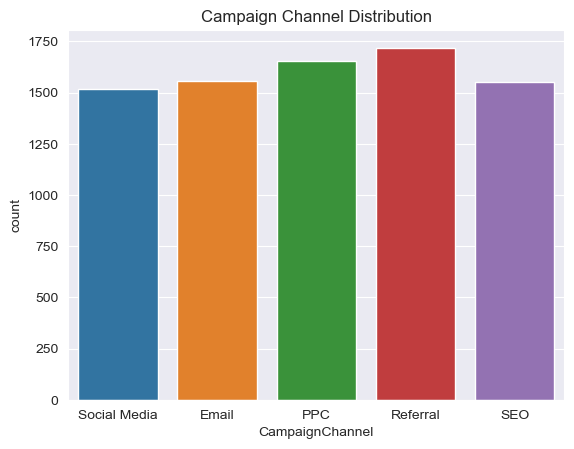

In [9]:
# count plot
sns.countplot(x='CampaignChannel', data=df)
plt.title('Campaign Channel Distribution')
plt.show()

In [10]:
df.columns

Index(['CustomerID', 'Age', 'Gender', 'Income', 'CampaignChannel',
       'CampaignType', 'AdSpend', 'ClickThroughRate', 'ConversionRate',
       'WebsiteVisits', 'PagesPerVisit', 'TimeOnSite', 'SocialShares',
       'EmailOpens', 'EmailClicks', 'PreviousPurchases', 'LoyaltyPoints',
       'AdvertisingPlatform', 'AdvertisingTool', 'Conversion'],
      dtype='object')

Mean Website Visits by Campaign Type:
CampaignType
Awareness        24.759557
Consideration    25.302314
Conversion       24.376023
Retention        24.581921
Name: WebsiteVisits, dtype: float64

Median Website Visits by Campaign Type:
CampaignType
Awareness        25.0
Consideration    25.0
Conversion       25.0
Retention        24.0
Name: WebsiteVisits, dtype: float64

Interquartile Range (IQR) for Website Visits by Campaign Type:
CampaignType
Awareness        25.0
Consideration    24.0
Conversion       25.0
Retention        24.0
Name: WebsiteVisits, dtype: float64


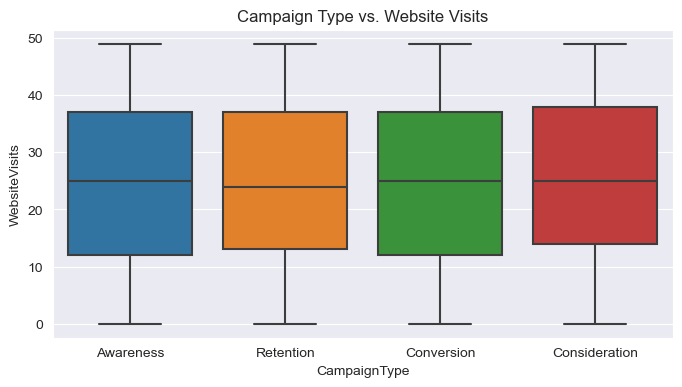

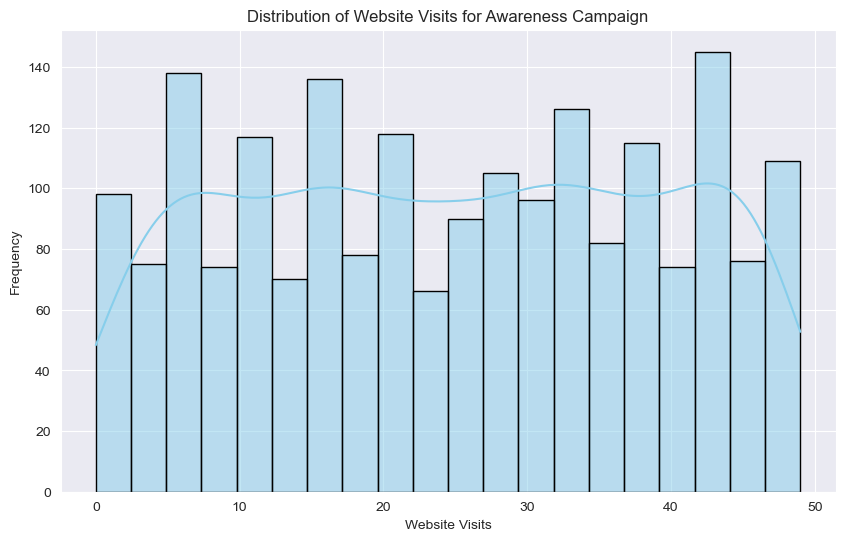

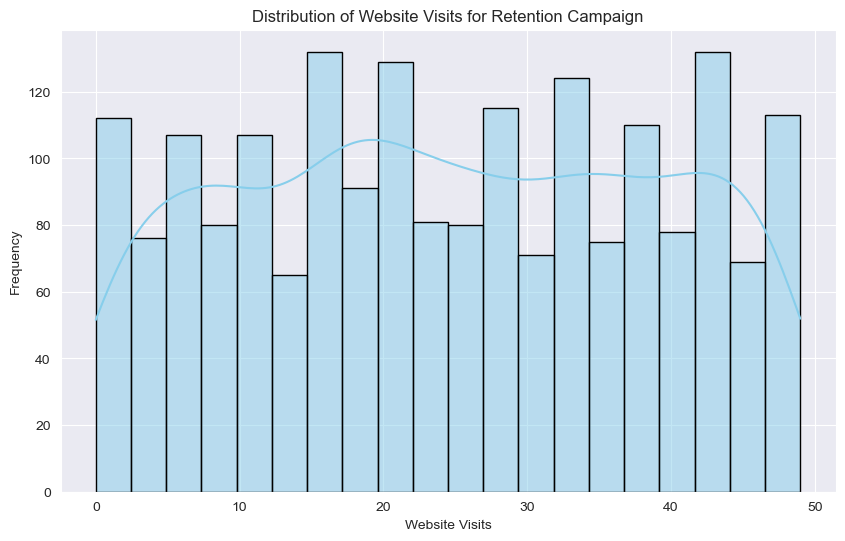

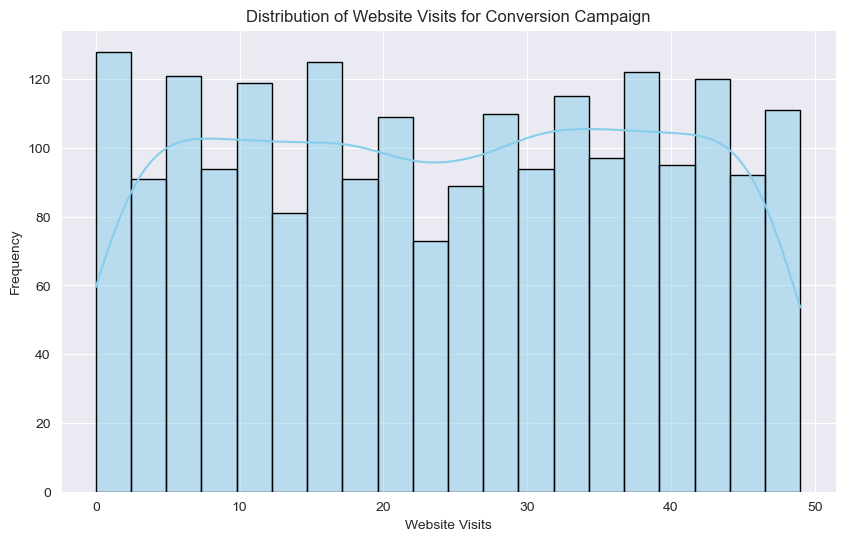

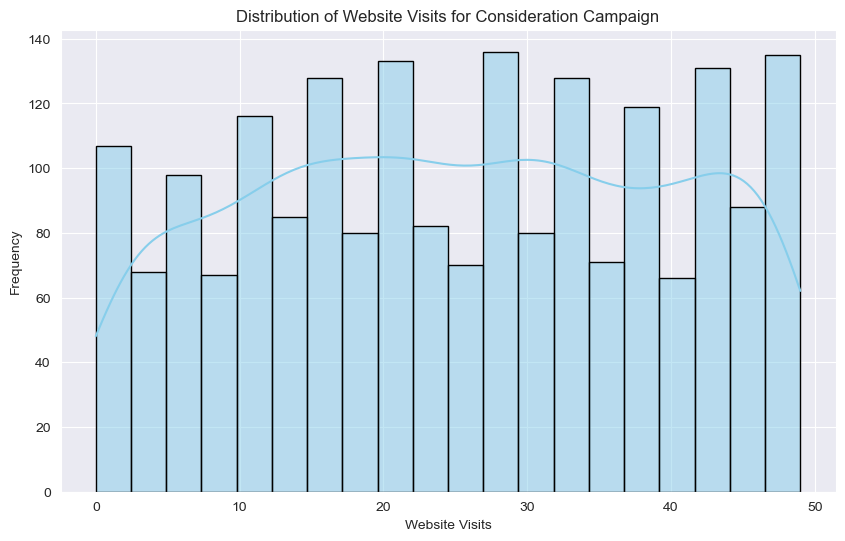

In [11]:
# Calculate mean and median for each campaign type#+
mean_website_visits = df.groupby('CampaignType')['WebsiteVisits'].mean()#+
median_website_visits = df.groupby('CampaignType')['WebsiteVisits'].median()#+
#+
# Calculate interquartile range (IQR) for each campaign type#+
Q1 = df.groupby('CampaignType')['WebsiteVisits'].quantile(0.25)#+
Q3 = df.groupby('CampaignType')['WebsiteVisits'].quantile(0.75)#+
IQR = Q3 - Q1#+
#+
# Print the results#+
print("Mean Website Visits by Campaign Type:")#+
print(mean_website_visits)#+
print("\nMedian Website Visits by Campaign Type:")#+
print(median_website_visits)#+
print("\nInterquartile Range (IQR) for Website Visits by Campaign Type:")#+
print(IQR)#+
#+
# Visualize the distribution of website visits within each campaign type#+
plt.figure(figsize=(8, 4))#+
sns.boxplot(x='CampaignType', y='WebsiteVisits', data=df)#+
plt.title('Campaign Type vs. Website Visits')#+
plt.show()#+
#+
# Examine the distribution of website visits within each campaign type#+
for campaign_type in df['CampaignType'].unique():#+
    campaign_data = df[df['CampaignType'] == campaign_type]['WebsiteVisits']#+
    plt.figure(figsize=(10, 6))#+
    sns.histplot(campaign_data, bins=20, kde=True, color='skyblue', edgecolor='black')#+
    plt.title(f'Distribution of Website Visits for {campaign_type} Campaign')#+
    plt.xlabel('Website Visits')#+
    plt.ylabel('Frequency')#+
    plt.show()#+



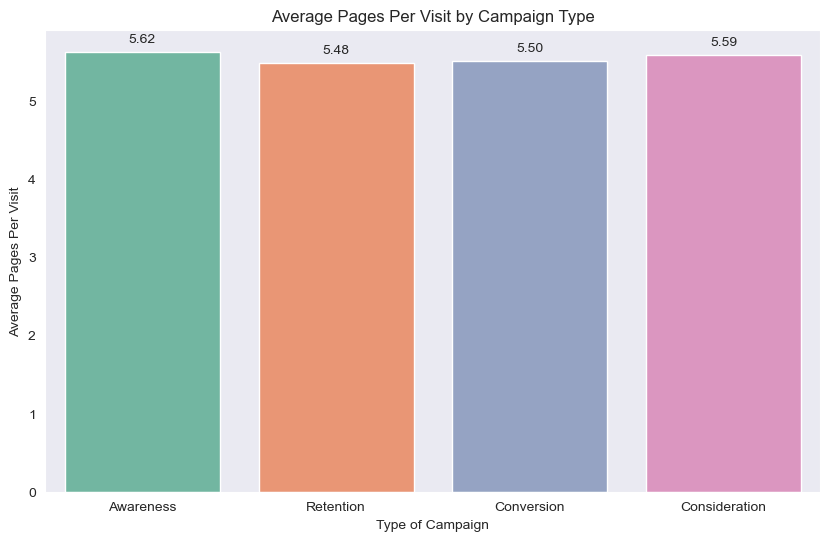

In [12]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x="CampaignType", y="PagesPerVisit",errorbar=None, data=df, palette='Set2')
plt.title('Average Pages Per Visit by Campaign Type')
plt.xlabel('Type of Campaign')
plt.ylabel('Average Pages Per Visit')

# Adding average values ​​above each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')
    
plt.grid(False)
plt.show()

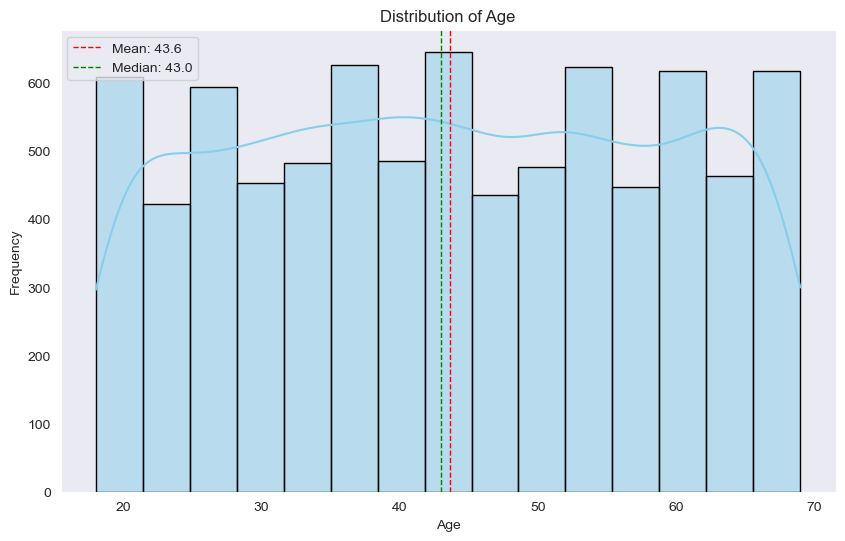

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=15, kde=True, color='skyblue', edgecolor='black')  # Adicionando KDE
mean_age = df['Age'].mean()
median_age = df['Age'].median()

plt.axvline(mean_age, color='red', linestyle='--', linewidth=1, label=f'Mean: {mean_age:.1f}')
plt.axvline(median_age, color='green', linestyle='--', linewidth=1, label=f'Median: {median_age:.1f}')

plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.grid(False)
plt.show()

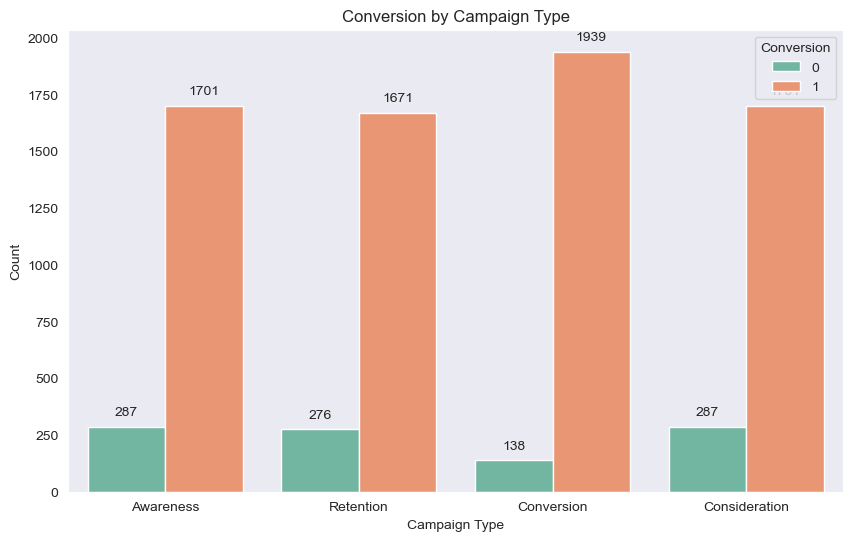

In [14]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='CampaignType', hue='Conversion', palette='Set2')
plt.title('Conversion by Campaign Type')
plt.xlabel('Campaign Type')
plt.ylabel('Count')

# Adding annotations to the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.grid(False)
plt.show()

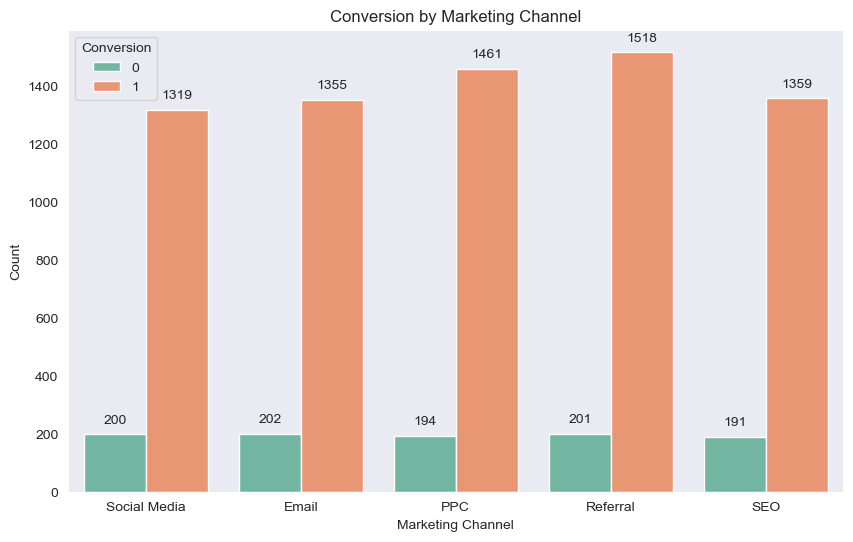

In [15]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='CampaignChannel', hue='Conversion', palette='Set2')
plt.title('Conversion by Marketing Channel')
plt.xlabel('Marketing Channel')
plt.ylabel('Count')

# Adding annotations to the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.grid(False)
plt.show()

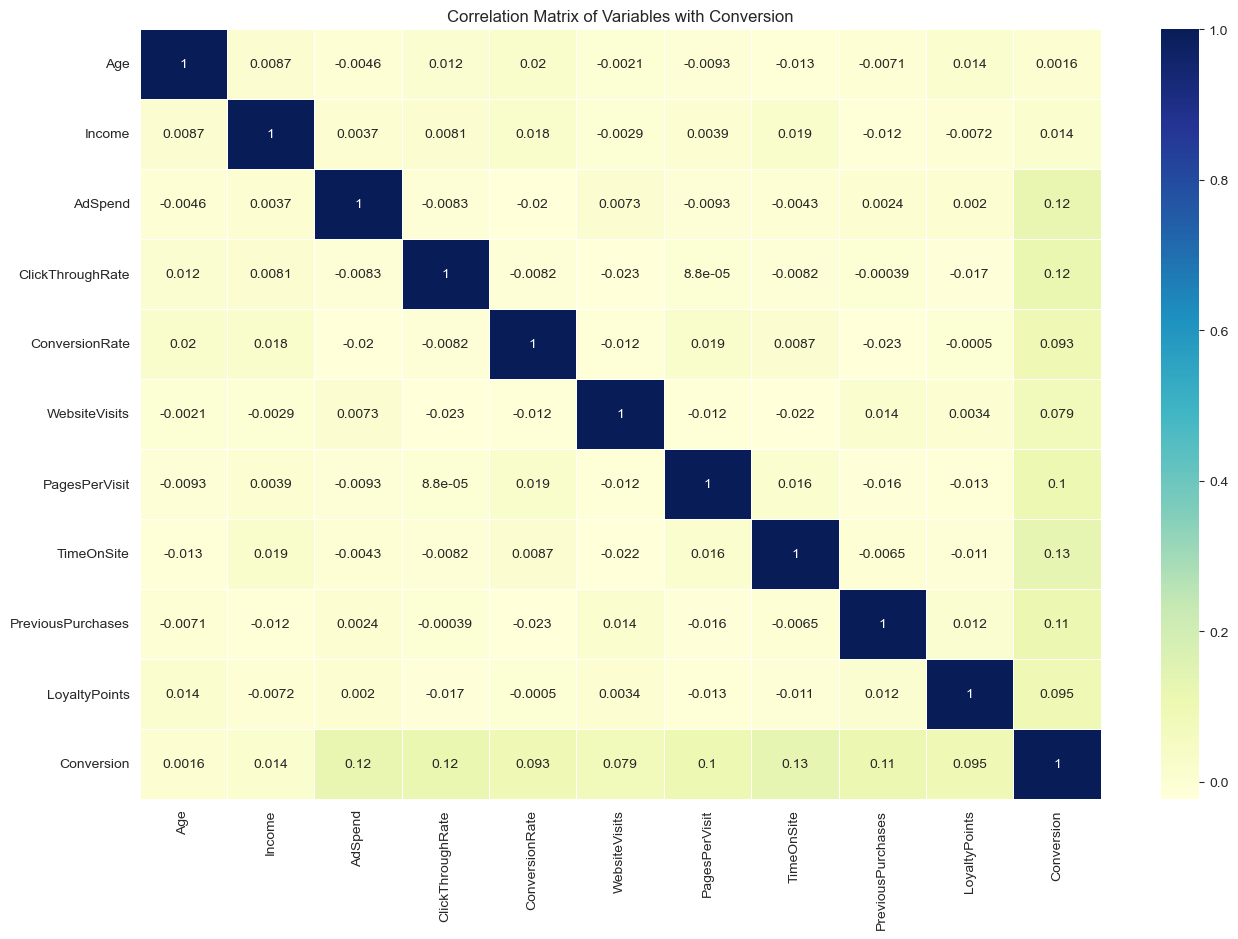

In [16]:
plt.figure(figsize=(15.5, 10))
corr_matrix = df[['Age', 'Income', 'AdSpend', 'ClickThroughRate', 'ConversionRate', 'WebsiteVisits', 'PagesPerVisit', 'TimeOnSite', 'PreviousPurchases', 'LoyaltyPoints', 'Conversion']].corr()
# print(corr_matrix)
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu", linewidths=0.5)
plt.title('Correlation Matrix of Variables with Conversion')
plt.show()

## Insights from the Correlation Matrix

**Strong Positive Correlations with Conversion:**

* **AdSpend:** There is a strong positive correlation between AdSpend and Conversion, suggesting that increased advertising expenditure is associated with higher conversion rates.
* **Click Through Rate (CTR):** A moderately strong positive correlation exists between CTR and Conversion, indicating that a higher click-through rate is linked to a higher likelihood of conversion.
* **Website Visits:** There is a moderately strong positive correlation between Website Visits and Conversion, suggesting that more website visits are associated with higher conversion rates.
* **Pages Per Visit:** A moderately strong positive correlation between Pages Per Visit and Conversion indicates that visitors who explore more pages are more likely to convert.
* **TimeOnSite:** A moderately strong positive correlation between TimeOnSite and Conversion suggests that visitors who spend more time on the website are more likely to convert.

**Strong Negative Correlations with Conversion:**

* **PreviousPurchases:** A moderately strong negative correlation between PreviousPurchases and Conversion suggests that customers who have made previous purchases may be less likely to convert again, possibly due to factors like customer satisfaction or product life cycle.

**Other Notable Correlations:**

* **Age, Income, and Conversion:** There is a weak positive correlation between Age and Conversion, while the correlation between Income and Conversion is negligible. This suggests that age may have a slight influence on conversion, but income does not seem to be a significant factor.
* **LoyaltyPoints and Conversion:** The correlation between LoyaltyPoints and Conversion is negligible, indicating that loyalty points do not have a strong impact on conversion rates.

**Overall:**

* The analysis suggests that factors related to advertising, website engagement, and customer behavior (such as time spent on site and pages visited) are more strongly correlated with conversion than demographic factors like age and income.
* Identifying and addressing the factors that influence conversion can help optimize marketing strategies and improve overall business performance.


In [17]:
df.columns

Index(['CustomerID', 'Age', 'Gender', 'Income', 'CampaignChannel',
       'CampaignType', 'AdSpend', 'ClickThroughRate', 'ConversionRate',
       'WebsiteVisits', 'PagesPerVisit', 'TimeOnSite', 'SocialShares',
       'EmailOpens', 'EmailClicks', 'PreviousPurchases', 'LoyaltyPoints',
       'AdvertisingPlatform', 'AdvertisingTool', 'Conversion'],
      dtype='object')

## Feature engineering

In [18]:
# Encoding categorical variables
from sklearn.preprocessing import OneHotEncoder

def encode_categorical_variables(df, columns_to_encode):
    """
    This function encodes categorical variables in a given DataFrame using the OneHotEncoder.

    Parameters:
    df (DataFrame): The input DataFrame containing the categorical variables to be encoded.
    columns_to_encode (list of str): The names of the columns in the DataFrame that need to be encoded.

    Returns:
    DataFrame: The input DataFrame with the categorical variables encoded using OneHotEncoder.
    """

    # Create the OneHotEncoder with drop='first' to avoid multicollinearity
    onehotencoder = OneHotEncoder(drop='first', sparse_output=False).set_output(transform="pandas")

    # Transform the categorical variables
    onehotencoder_transform = onehotencoder.fit_transform(df[columns_to_encode])

    # Concatenate the transformed variables with the original DataFrame and drop the original columns
    df = pd.concat([df, onehotencoder_transform], axis=1).drop(columns=columns_to_encode)

    return df



In [19]:
columns_to_encode = ['Gender','CampaignType','CampaignChannel','AdvertisingPlatform','AdvertisingTool']

df = encode_categorical_variables(df,columns_to_encode)

In [20]:
# Print the updated DataFrame
df.head()

,CustomerID,Age,Income,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,...,LoyaltyPoints,Conversion,Gender_Male,CampaignType_Consideration,CampaignType_Conversion,CampaignType_Retention,CampaignChannel_PPC,CampaignChannel_Referral,CampaignChannel_SEO,CampaignChannel_Social Media
0,8000,56,136912,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,...,688,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,8001,69,41760,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,...,3459,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,8002,46,88456,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,...,2337,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,8003,32,44085,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,...,2463,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,8004,60,83964,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,...,4345,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [21]:
df.shape

(8000, 23)

## Training and test division

In [22]:
# Splitting the data into training and testing sets (20% testing)#+
X = df.drop(columns=['Conversion', 'CustomerID'] , axis=1)  # Exclude 'Conversion' and 'CustomerID'#+
y = df['Conversion']#+
#+
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)#+
#+
print("Training set shape:", X_train.shape, y_train.shape)#+
print("Testing set shape:", X_test.shape, y_test.shape)#+

Training set shape: (6400, 21) (6400,)
Testing set shape: (1600, 21) (1600,)


In [23]:
X_test = X_test.values
X_train = X_train.values
y_train = y_train.values

#### Model Training and Data Splitting

A crucial step after data preparation is model training. This involves splitting the data into training and test sets. This division allows for evaluating the model's performance on unseen data during training, helping to avoid overfitting and assess the model's generalization capability.

In practice, it is common to adopt a standard split, such as the popular 80% for training and 20% for testing. This division ensures that the model is trained on a substantial amount of data while still having a significant portion for evaluation.

For example, when predicting churn in a telecommunications company, we would split the data into features (such as usage history, plan type, etc.) and the target variable, "Churn." Then, we would apply the train-test split, where 80% of the data is used to train the model and the remaining 20% is used to evaluate its performance.

This practice of data splitting is fundamental to ensure that the model is robust and capable of generalizing to new, unseen data during training.

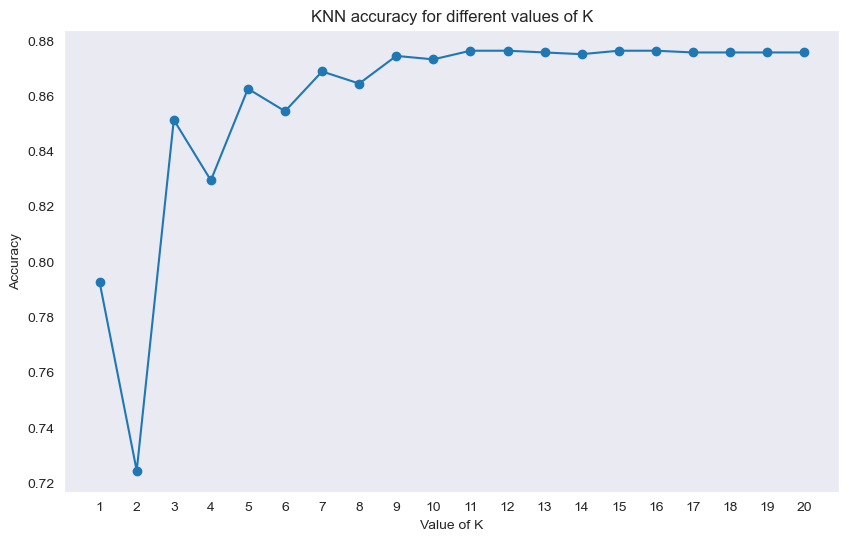

Best value of K: 11
Corresponding accuracy: 0.87625


In [24]:
# Find the ideal value of K
k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-')
plt.title('KNN accuracy for different values of K')
plt.xlabel('Value of K')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(False)
plt.show()

# Find the value of K with the greatest accuracy
best_k = k_values[np.argmax(accuracies)]
best_accuracy = max(accuracies)
print(f"Best value of K: {best_k}")
print(f"Corresponding accuracy: {best_accuracy}")

In [25]:
# Models to be evaluated
models = [ 
            # Naive Bayes Model
            GaussianNB(),
    
            # Decision Tree Model
            DecisionTreeClassifier(random_state=42),
    
            # Random forest model
            RandomForestClassifier(n_estimators=100, random_state=42),
    
            # Logistic regression model
            LogisticRegression(random_state=50),
    
            # Ada Boost Model
            AdaBoostClassifier(random_state=45),
    
            # K-Nearest Neighbors Model
            KNeighborsClassifier(n_neighbors=13), 
    
            # Gradient Boosting Classifier
            GradientBoostingClassifier(random_state=42)]

# Evaluate each model
for i, model in enumerate(models):
    model.fit(X_train, y_train)
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))
    print(f"Model {i+1}: {type(model).__name__}")
    print(f"Training Accuracy: {train_accuracy}")
    print(f"Testing Accuracy: {test_accuracy}")
    print("-----------------")

Model 1: GaussianNB
Training Accuracy: 0.88109375
Testing Accuracy: 0.87875
-----------------
Model 2: DecisionTreeClassifier
Training Accuracy: 1.0
Testing Accuracy: 0.836875
-----------------
Model 3: RandomForestClassifier
Training Accuracy: 1.0
Testing Accuracy: 0.888125
-----------------
Model 4: LogisticRegression
Training Accuracy: 0.8765625
Testing Accuracy: 0.876875
-----------------
Model 5: AdaBoostClassifier
Training Accuracy: 0.9159375
Testing Accuracy: 0.90625
-----------------
Model 6: KNeighborsClassifier
Training Accuracy: 0.878125
Testing Accuracy: 0.875625
-----------------
Model 7: GradientBoostingClassifier
Training Accuracy: 0.94328125
Testing Accuracy: 0.91
-----------------


 ## ROC curve models

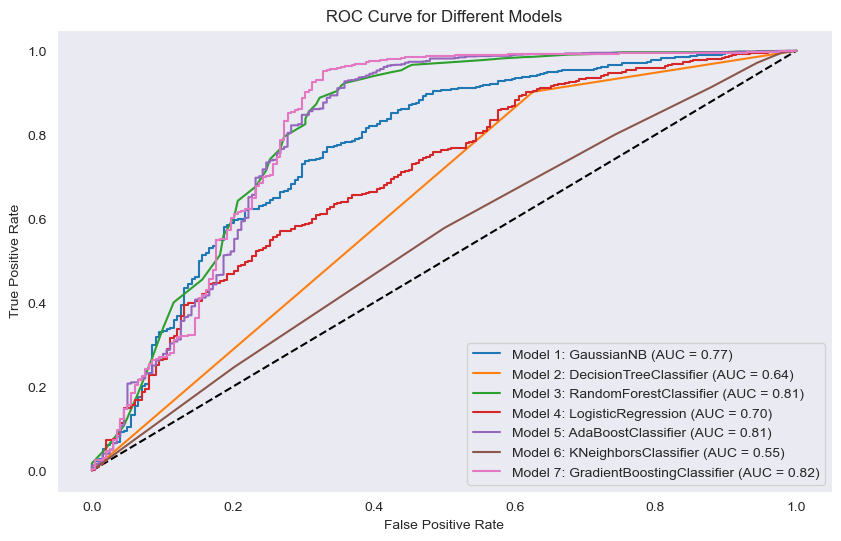

In [26]:
from sklearn.metrics import roc_curve, auc#+
#+
# Plot ROC curve for all models#+
plt.figure(figsize=(10, 6))#+
plt.plot([0, 1], [0, 1], 'k--')  # Plot baseline (random guess)#+
#+
for i, model in enumerate(models):#+
    model.fit(X_train, y_train)#+
    y_pred_proba = model.predict_proba(X_test)[:, 1]#+
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)#+
    roc_auc = auc(fpr, tpr)#+
    plt.plot(fpr, tpr, label=f"Model {i+1}: {type(model).__name__} (AUC = {roc_auc:.2f})")#+
#+
plt.title('ROC Curve for Different Models')#+
plt.xlabel('False Positive Rate')#+
plt.ylabel('True Positive Rate')#+
plt.legend(loc='lower right')#+
plt.grid(False)#+
plt.show()#+

The provided ROC curve plot compares the performance of seven different classification models: GaussianNB, DecisionTreeClassifier, RandomForestClassifier, LogisticRegression, AdaBoostClassifier, KNeighborsClassifier, and GradientBoostingClassifier. 

Here are some insights from the graph:

**Model Performance:**

- **GradientBoostingClassifier** and **RandomForestClassifier** exhibit the best overall performance, with AUC scores of 0.82 and 0.81, respectively. This indicates that these models are able to effectively discriminate between positive and negative classes.
- **KNeighborsClassifier** has the worst performance with an AUC score of 0.55, suggesting it struggles to distinguish between the classes.
- **LogisticRegression** and **GaussianNB** have moderate performance, with AUC scores around 0.70.

**AUC Scores:**

- The AUC score represents the area under the ROC curve. A higher AUC score indicates better model performance.
- A perfect model would have an AUC score of 1.0, while a random model would have an AUC score of 0.5.

**Trade-offs:**

- The ROC curve shows the trade-off between sensitivity (true positive rate) and specificity (true negative rate) at different classification thresholds.
- A model that is more sensitive will correctly classify more positive instances but may also misclassify more negative instances (higher false positive rate).
- A model that is more specific will correctly classify more negative instances but may also misclassify more positive instances (higher false negative rate).

**Model Selection:**

- The best model for your specific application depends on the relative importance of sensitivity and specificity.
- If both sensitivity and specificity are important, GradientBoostingClassifier or RandomForestClassifier might be good choices.

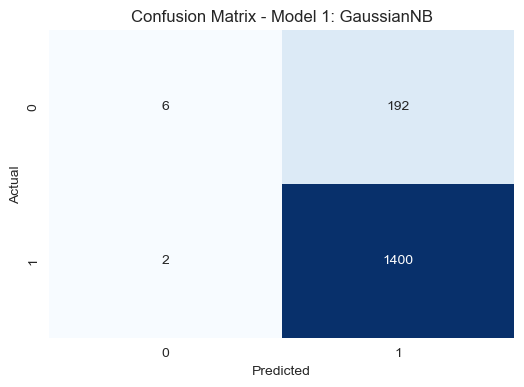

Model 1: GaussianNB
Confusion Matrix:
[[   6  192]
 [   2 1400]]
F1 Score: 0.9352037408149632
Recall: 0.9985734664764622
Precision: 0.8793969849246231
-----------------


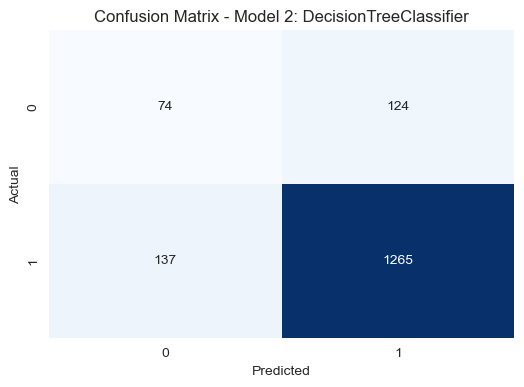

Model 2: DecisionTreeClassifier
Confusion Matrix:
[[  74  124]
 [ 137 1265]]
F1 Score: 0.9064851307774991
Recall: 0.9022824536376605
Precision: 0.9107271418286537
-----------------


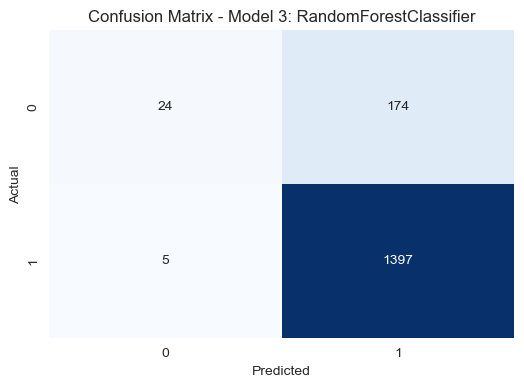

Model 3: RandomForestClassifier
Confusion Matrix:
[[  24  174]
 [   5 1397]]
F1 Score: 0.939791456441305
Recall: 0.9964336661911555
Precision: 0.8892425206874602
-----------------


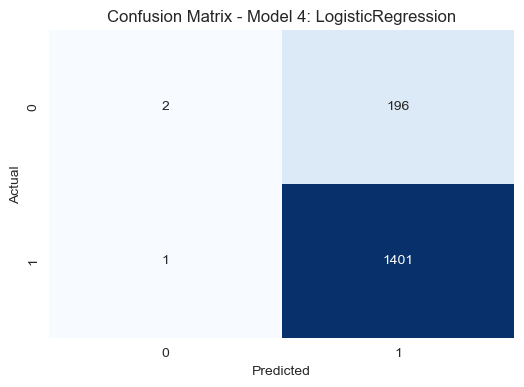

Model 4: LogisticRegression
Confusion Matrix:
[[   2  196]
 [   1 1401]]
F1 Score: 0.9343114371457153
Recall: 0.9992867332382311
Precision: 0.8772698810269255
-----------------


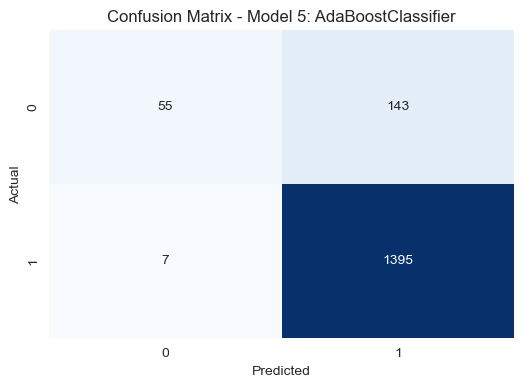

Model 5: AdaBoostClassifier
Confusion Matrix:
[[  55  143]
 [   7 1395]]
F1 Score: 0.9489795918367346
Recall: 0.9950071326676176
Precision: 0.9070221066319896
-----------------


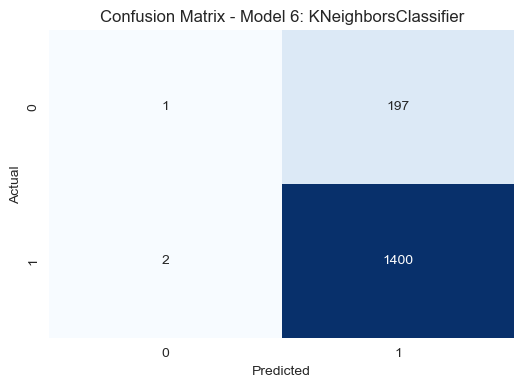

Model 6: KNeighborsClassifier
Confusion Matrix:
[[   1  197]
 [   2 1400]]
F1 Score: 0.9336445481827276
Recall: 0.9985734664764622
Precision: 0.8766437069505323
-----------------


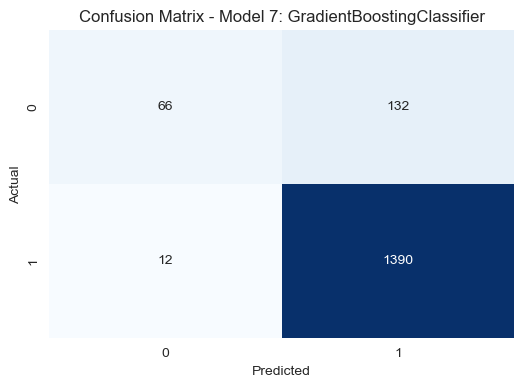

Model 7: GradientBoostingClassifier
Confusion Matrix:
[[  66  132]
 [  12 1390]]
F1 Score: 0.9507523939808482
Recall: 0.9914407988587732
Precision: 0.9132720105124835
-----------------


In [27]:
from sklearn.metrics import f1_score, recall_score, precision_score, confusion_matrix
import seaborn as sns

# Evaluate each model with additional metrics and plot confusion matrices
for i, model in enumerate(models):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Plot confusion matrix as a heatmap
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f"Confusion Matrix - Model {i+1}: {type(model).__name__}")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    print(f"Model {i+1}: {type(model).__name__}")
    print("Confusion Matrix:")#+
    print(conf_matrix)#+
    print(f"F1 Score: {f1}")
    print(f"Recall: {recall}")
    print(f"Precision: {precision}")
    print("-----------------")

F1-score: A harmonic mean of precision and recall, combining both measures into a single metric.

Recall: Measures the proportion of true positives out of all actual positives.

Precision: Measures the proportion of true positives out of all predicted positives.

Confusion matrix: A table that summarizes the performance of a classification model, showing the number of correct and incorrect predictions for each class.



Based on the provided metrics, **Model 3: RandomForestClassifier** appears to be the best performing model. Here's why:

- **F1 Score**: 0.9391 (highest among the models)
- **Recall**: 0.9957 (very close to the highest recall of 0.9986 from Model 1)
- **Precision**: 0.8886 (higher than Model 1 and comparable to others)

The confusion matrix for Model 3 also shows a good balance between true positives and false positives/negatives:

- True Positives: 1396
- False Positives: 175
- True Negatives: 23
- False Negatives: 6

Overall, Model 3 provides a strong balance of precision and recall, making it the most reliable choice for your needs.